In [3]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pickle
import cv2
path_to_data = "../../Challenge/data/"

In [4]:
#x_train = genfromtxt(path_to_data + 'Xtr.csv', delimiter = ',')

#y_train = genfromtxt(path_to_data + 'ytr.csv', delimiter = ',', skip_header=1)

#x_test = genfromtxt(path_to_data + 'Xte.csv', delimiter = ',')

In [5]:
"""with open('x_train.pkl', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(x_train)
    
with open('y_train.pkl', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(y_train)
    
with open('x_test.pkl', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(x_test)"""

"with open('x_train.pkl', 'wb') as fichier:\n    mon_pickler = pickle.Pickler(fichier)\n    mon_pickler.dump(x_train)\n    \nwith open('y_train.pkl', 'wb') as fichier:\n    mon_pickler = pickle.Pickler(fichier)\n    mon_pickler.dump(y_train)\n    \nwith open('x_test.pkl', 'wb') as fichier:\n    mon_pickler = pickle.Pickler(fichier)\n    mon_pickler.dump(x_test)"

In [6]:
with open('x_train.pkl', 'rb') as fichier:
    mon_depickler = pickle.Unpickler(fichier)
    x_train = mon_depickler.load()
    
with open('y_train.pkl', 'rb') as fichier:
    mon_depickler = pickle.Unpickler(fichier)
    y_train = mon_depickler.load()

with open('x_test.pkl', 'rb') as fichier:
    mon_depickler = pickle.Unpickler(fichier)
    x_test = mon_depickler.load()

In [7]:
# reshape the arrays
def ar_reshape(array, image_size = 1024):
    reshaped_ar = array.T[:-1].T.reshape(len(array),3,image_size)
    result = np.empty([len(array), image_size, 3])
    for i in range(len(reshaped_ar)):
        result[i] = reshaped_ar[i].T
    return result

# reshape the arrays for open cv
def ar_reshape_cv(array, image_size = 1024):
    im_side = int(np.sqrt(image_size))
    reshaped_ar = array.T[:-1].T.reshape(len(array),3,image_size)
    result = np.empty([len(array), im_side, im_side, 3])
    for i in range(len(reshaped_ar)):
        result[i] = reshaped_ar[i].T.reshape(im_side, im_side, 3)
    
    return result

In [25]:
## Modified by Younes
# reshape the arrays
def ar_reshape(array, image_size = 1024):
    reshaped_ar = array.T[:-1].T.reshape(len(array),3,image_size)
    result = np.empty([len(array), image_size, 3])
    for i in range(len(reshaped_ar)):
        temp_res = reshaped_ar[i].T
        res_min = np.min(temp_res)
        res_max = np.max(temp_res)
        result[i] = 255*(temp_res-res_min)/(res_max-res_min)
    return result.astype(np.uint8)

# reshape the arrays for open cv
def ar_reshape_cv(array, image_size = 1024):
    im_side = int(np.sqrt(image_size))
    reshaped_ar = array.T[:-1].T.reshape(len(array),3,image_size)
    result = np.empty([len(array), im_side, im_side, 3])
    for i in range(len(reshaped_ar)):
        temp_res = reshaped_ar[i].T.reshape(im_side, im_side, 3)
        res_min = np.min(temp_res)
        res_max = np.max(temp_res)
        result[i] = 255*(temp_res-res_min)/(res_max-res_min)
    
    return result.astype(np.uint8)

In [26]:
x_tr_rs = ar_reshape(x_train)
x_te_rs = ar_reshape(x_test)

x_tr_rs_cv = ar_reshape_cv(x_train)
x_te_rs_cv = ar_reshape_cv(x_test)

In [27]:
# show images

def im_show(array, image_size = 1024):
    size = int(np.sqrt(image_size))
    reshaped_ar = array.reshape(size, size, 3)
    plt.gray()
    plt.imshow(reshaped_ar)
    plt.show()

def im_show_cv(array):
    plt.imshow(array)
    plt.show()


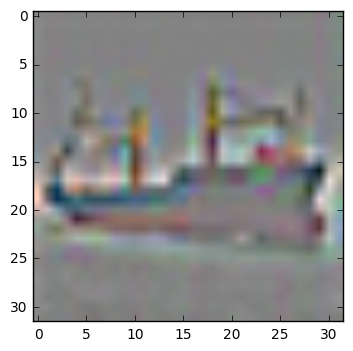

[ 1.  8.]


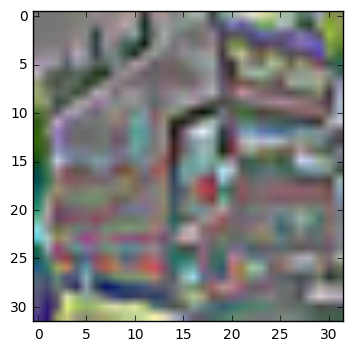

[ 2.  9.]


In [30]:
# afficher par niveaux
for i in range(2):
    im_show(x_tr_rs[i])
    print(y_train[i])

array([[[  7.01830600e-03,   4.95037800e-03,   4.64647900e-03],
        [  3.23271000e-04,  -1.77140900e-03,  -4.22530100e-04],
        [  2.21460900e-03,  -2.58023700e-03,  -2.06720300e-04],
        ..., 
        [  7.66349300e-03,  -1.47518300e-02,   8.80278600e-04],
        [ -4.40182600e-03,  -3.98288200e-03,  -2.94412100e-03],
        [ -1.12776700e-02,   1.17502400e-02,  -9.18589800e-03]],

       [[  1.34035000e-02,   9.19505300e-03,   9.75024400e-03],
        [  2.73685300e-03,   1.33411200e-03,   2.70818700e-03],
        [  5.30237500e-03,  -2.86515500e-04,   3.61453600e-03],
        ..., 
        [  6.61243200e-03,  -2.79390000e-03,   9.04302700e-03],
        [ -2.63888600e-03,   3.91875200e-03,   6.41319800e-03],
        [ -5.38102300e-03,   1.05450800e-02,   2.22164500e-03]],

       [[  4.31503400e-03,   1.16253300e-02,   9.92462800e-03],
        [ -7.08838500e-04,  -3.15673800e-03,  -2.11292800e-03],
        [  2.65160400e-04,  -3.55752600e-03,  -1.56427700e-03],
        

# 1st Classification attempt : SVM classifier with scikit learn

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3],
                     'C': [100]}]
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                     'C': [1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']


for score in scores:
    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(x_train[:,:-1], y_train[:,-1])

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    y_true, y_pred = y_test, clf.predict(x_test[:,:-1])
    print(classification_report(y_true, y_pred))
    print()

In [29]:
y_train

array([[  1.00000000e+00,   8.00000000e+00],
       [  2.00000000e+00,   9.00000000e+00],
       [  3.00000000e+00,   3.00000000e+00],
       ..., 
       [  4.99800000e+03,   1.00000000e+00],
       [  4.99900000e+03,   7.00000000e+00],
       [  5.00000000e+03,   5.00000000e+00]])

# HOG OBSOLETE

In [40]:
x_tr_rs[1]

array([[ 0.00081882,  0.000319  ,  0.00036393],
       [ 0.00168827,  0.00061621,  0.0012866 ],
       [ 0.0026975 , -0.00036886,  0.00352775],
       ..., 
       [-0.05366169, -0.02463626, -0.04676265],
       [-0.05614039, -0.02528611, -0.0489189 ],
       [-0.06498231, -0.02776589, -0.05744892]])

In [54]:
img = x_te_rs_cv[1]

cv2.imshow('image',255*img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: /Users/travis/build/skvark/opencv-python/opencv/modules/highgui/src/window.cpp:583: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage


In [130]:
#help(cv2.HOGDescriptor())

img = x_tr_rs_cv[3,:,:,1]


In [131]:
cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 16  # number of orientation bins

In [132]:
# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

In [133]:
n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.

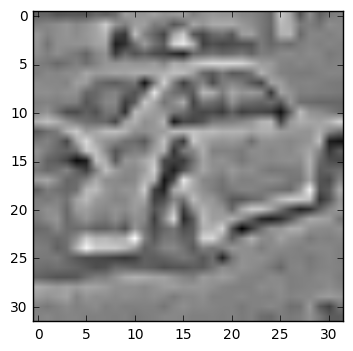

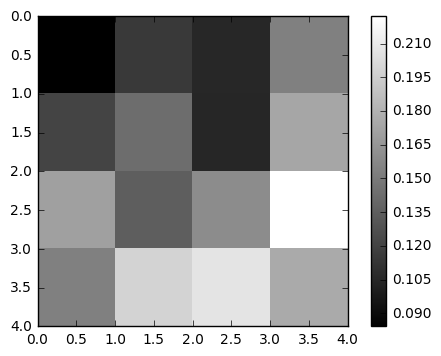

In [134]:
gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# count cells (border cells appear less often across overlapping groups)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

# Preview
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

bin = 5  # angle is 360 / nbins * direction
plt.pcolor(gradients[:, :, bin])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

# FINAL HOG

In [220]:
def cartToPolar(gx, gy):
    
    mag = np.sqrt(gx**2 + gy**2)
    ang = (np.arctan(gy/(gx+1e-20)) % (2*np.pi))
    
    return mag, ang

def RGB_cartToPolar(gx, gy):
    shape = gx.shape
    
    mag = np.zeros(shape)
    ang = np.zeros(shape)
    
    for i in range(shape[2]):
        mag[:, :, i], ang[:, :, i] = cartToPolar(gx[:, :, i], gy[:, :, i])
    
    return mag, ang

def sobel(img, orientation):
    n = img.shape[0]
    m = img.shape[1]
    top = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    left = np.transpose(top)
    bottom = -top
    right = np.transpose(bottom)
    result = np.zeros(img.shape)
    if orientation == 'left' or orientation == 'right':
        shape = list(img.shape)
        shape[0] += 2
        shape = tuple(shape)
        eim = np.zeros(shape)
        eim[1:-1,:] = img
        for i in range(n):
            for j in range(m-2):
                result[i,j+1] = np.sum(np.multiply(eval(orientation),\
                                                   eim[i:i+3,j:j+3]))
    elif orientation == 'bottom' or orientation == 'top':
        shape = list(img.shape)
        shape[1] += 2
        shape = tuple(shape)
        eim = np.zeros(shape)
        eim[:,1:-1] = img
        for i in range(n-2):
            for j in range(m):
                result[i+1,j] = np.sum(np.multiply(eval(orientation),\
                                                   eim[i:i+3,j:j+3]))
   
    
    return (result*255/(np.max(result))).astype('int')

def top_filter(image):
    n = image.shape[0]
    m = image.shape[1]
    
    filter_matrix = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    filtered_im = np.zeros(image.shape)

    new_shape = list(image.shape)
    new_shape[1] += 2
    new_shape = tuple(new_shape)
    
    embed_im = np.zeros(new_shape)
    embed_im[:,1:-1] = image
    
    for i in range(n-2):
        for j in range(m):
            filtered_im[i+1,j] = np.sum(np.multiply(filter_matrix, embed_im[i:i+3,j:j+3]))
    
    return (filtered_im*255/(np.max(filtered_im))).astype('int')

def bottom_filter(image):
    n = image.shape[0]
    m = image.shape[1]
    
    filter_matrix = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    filtered_im = np.zeros(image.shape)

    new_shape = list(image.shape)
    new_shape[1] += 2
    new_shape = tuple(new_shape)
    
    embed_im = np.zeros(new_shape)
    embed_im[:,1:-1] = image
    
    for i in range(n-2):
        for j in range(m):
            filtered_im[i+1,j] = np.sum(np.multiply(filter_matrix, embed_im[i:i+3,j:j+3]))
    
    return (filtered_im*255/(np.max(filtered_im))).astype('int')

def left_filter(image):
    n = image.shape[0]
    m = image.shape[1]
    
    filter_matrix = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    filtered_im = np.zeros(image.shape)

    new_shape = list(image.shape)
    new_shape[0] += 2
    new_shape = tuple(new_shape)
    
    embed_im = np.zeros(new_shape)
    embed_im[1:-1,:] = image
        
    for i in range(n):
        for j in range(m-2):
            filtered_im[i,j+1] = np.sum(np.multiply(filter_matrix, embed_im[i:i+3,j:j+3]))
    
    return (filtered_im*255/(np.max(filtered_im))).astype('int')

def right_filter(image):
    n = image.shape[0]
    m = image.shape[1]
    
    filter_matrix = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    filtered_im = np.zeros(image.shape)

    new_shape = list(image.shape)
    new_shape[0] += 2
    new_shape = tuple(new_shape)
    
    embed_im = np.zeros(new_shape)
    embed_im[1:-1,:] = image
        
    for i in range(n):
        for j in range(m-2):
            filtered_im[i,j+1] = np.sum(np.multiply(filter_matrix, embed_im[i:i+3,j:j+3]))
    
    return (filtered_im*255/(np.max(filtered_im))).astype('int')

def sobel_filter(image, boolx, booly):
    if boolx==1 and booly==0 : return right_filter(image)
    if boolx==-1 and booly==0 : return left_filter(image)
    if boolx==0 and booly==1 : return bottom_filter(image)
    if boolx==0 and booly==-1 : return top_filter(image)
    print("incoherent input for bool x and/or bool y")
    return image


def hog(img):
    gx = sobel_filter(img, 1, 0)
    gy = sobel_filter(img, 0, 1)
    
    mag, ang = RGB_cartToPolar(gx, gy)
    
    bin_n = 16 # Number of bins
    bin = np.int32(bin_n*ang/(2*np.pi))

    bin_cells = []
    mag_cells = []

    cellx = celly = 8
    
    for k in range(img.shape[2]):
        for i in range(0,img.shape[0]//celly):
            for j in range(0,img.shape[1]//cellx):
                bin_cells.append(bin[i*celly : i*celly+celly, j*cellx : j*cellx+cellx, k])
                mag_cells.append(mag[i*celly : i*celly+celly, j*cellx : j*cellx+cellx, k])   

    hists = [np.bincount(b.ravel(), b.ravel - b.ravel, bin_n) for b, m in zip(bin_cells, mag_cells)]
#    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)

    # transform to Hellinger kernel
    eps = 1e-7
    #hist /= hist.sum() + eps
    #hist = np.sqrt(hist)
    #hist /= norm(hist) + eps

    return hists

In [221]:
x =  x_tr_rs_cv[1]

gx = sobel_filter(x, 1, 0)
gy = sobel_filter(x, 0, 1)

mag, ang = RGB_cartToPolar(gx, gy)

h = hog(x)


TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'builtin_function_or_method'

In [196]:
"""img = np.random.rand(32,32,3)

grandx = sobel_filter(img, 1, 0)
grandy = sobel_filter(img, 0, 1)

magr, angr = RGB_cartToPolar(grandx, grandy)

h = hog(img)"""

'img = np.random.rand(32,32,3)\n\ngrandx = sobel_filter(img, 1, 0)\ngrandy = sobel_filter(img, 0, 1)\n\nmagr, angr = RGB_cartToPolar(grandx, grandy)\n\nh = hog(img)'

In [199]:
h

[array([  173.32051136,   165.45612604,   335.63724242,   333.40210809,
         1409.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
          983.93534397,   212.12949335,   181.67798698,   124.16775417]),
 array([ 280.30939949,   85.4159056 ,  180.31697536,  568.53823244,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
         732.08281425,  482.91999156,  226.17075983,  331.19728155]),
 array([ 1158.12884802,   505.65235017,   326.93845098,   550.25647501,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
          712.7390809 ,   737.70735704,   742.31191273,   468.02462178]),
 array([ 2066.80983739,   587.99331107,    77.17556429,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
  